In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv("E://spam.csv", encoding="Latin1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.rename(columns={"v1":"target", "v2": "message"}, inplace=True)

In [11]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df["target"]=df["target"].replace({"ham": 0, "spam":1})

C:\Users\U$ER\AppData\Local\Temp\ipykernel_13048\1705736562.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["target"]=df["target"].replace({"ham": 0, "spam":1})


In [18]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.duplicated().sum()

403

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x29d63321100>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'not spam'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

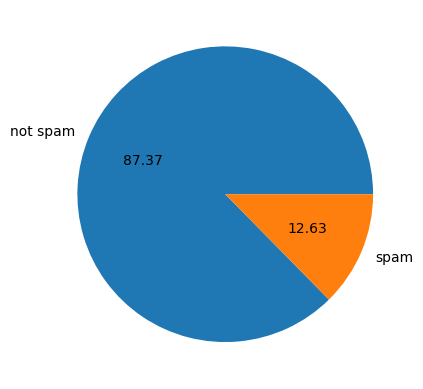

In [25]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["not spam", "spam"], autopct="%0.2f")

In [26]:
df["num_chars"]=df["message"].apply(len)

In [27]:
df.head()

,target,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

In [29]:
df["num_words"]=df["message"].apply(lambda x: len(word_tokenize(x)))

In [30]:
df.head()

,target,message,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df["num_sentences"]=df["message"].apply(lambda x: len(sent_tokenize(x)))

In [33]:
df.head()

,target,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.describe()

,target,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [35]:
df[df["target"]==0][["num_words", "num_sentences"]].describe()

,num_words,num_sentences
count,4516.000000,4516.000000
mean,17.123782,1.820195
std,13.493970,1.383657
min,1.000000,1.000000
25%,8.000000,1.000000
50%,13.000000,1.000000
75%,22.000000,2.000000
max,220.000000,38.000000


In [36]:
df[df["target"]==1][["num_words", "num_sentences"]].describe()

,num_words,num_sentences
count,653.000000,653.000000
mean,27.667688,2.970904
std,7.008418,1.488425
min,2.000000,1.000000
25%,25.000000,2.000000
50%,29.000000,3.000000
75%,32.000000,4.000000
max,46.000000,9.000000


<Axes: xlabel='num_words', ylabel='Count'>

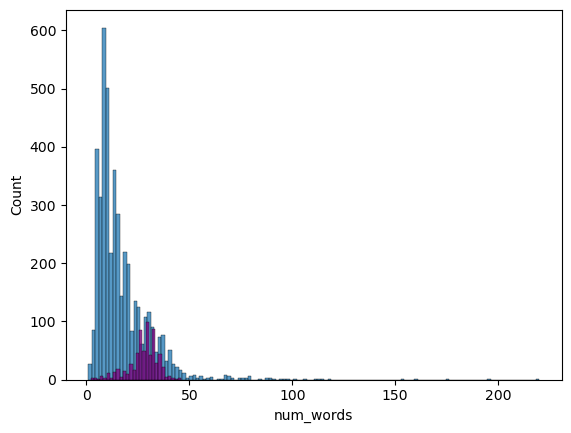

In [38]:
import seaborn as sns
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="purple")

<Figure size 1200x800 with 0 Axes>

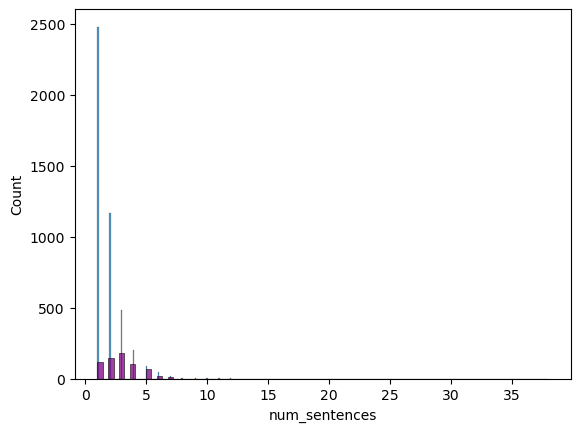

<Figure size 1200x800 with 0 Axes>

In [39]:
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="purple")
plt.figure(figsize=(12, 8))

In [50]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [55]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [61]:
def transform_text(text):
    text=text.lower()
    text=word_tokenize(text)
    y=[]
    for i in text:
        if (i.isalnum()):
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english"):
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        temp=ps.stem(i)
        y.append(temp)
    text=y[:]
    y.clear()


    return " ".join(text)
        
    
            

In [62]:
print(transform_text("Swimming swimmer !! , ? he is a good boy"))

swim swimmer good boy


In [63]:
df["transformed_text"]=df["message"].apply(transform_text)

In [64]:
df.head()

,target,message,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [66]:
import wordcloud
from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color="white")


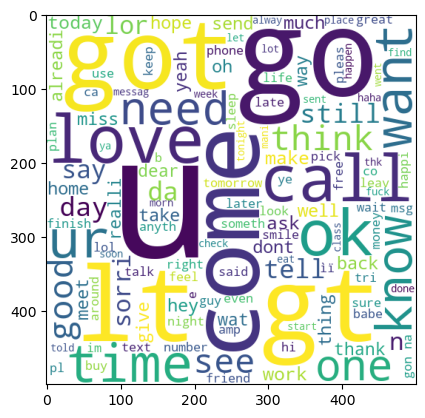

In [68]:
notspam=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(notspam)

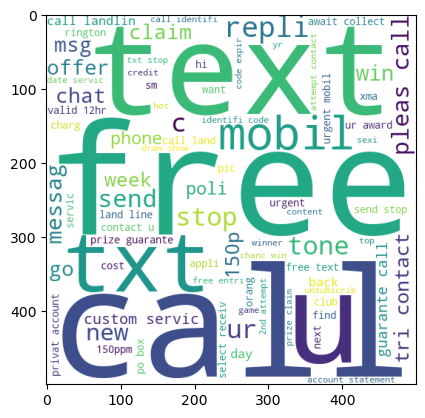

In [70]:
spam=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam)

In [71]:
from collections import Counter
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spamcommon=pd.DataFrame(Counter(spam_corpus).most_common(30))      
spamcommon    

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


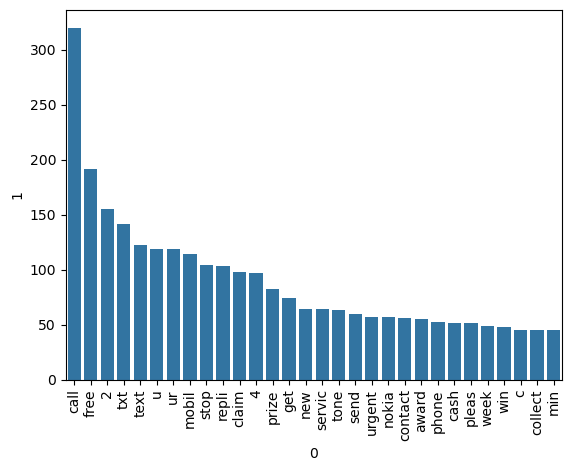

In [73]:
sns.barplot(x=spamcommon[0],y=spamcommon[1])
plt.xticks(rotation="vertical")
plt.show()

In [74]:
from collections import Counter
spam_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
notspam=pd.DataFrame(Counter(spam_corpus).most_common(30))      
notspam

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


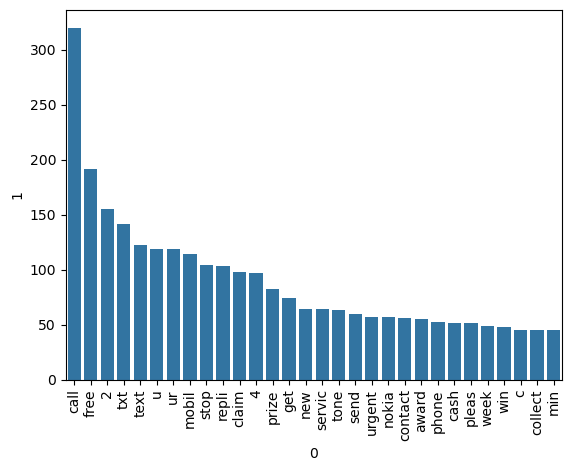

In [75]:
sns.barplot(x=spamcommon[0],y=spamcommon[1])
plt.xticks(rotation="vertical")
plt.show()

In [76]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer= TfidfVectorizer()

In [79]:
x=vectorizer.fit_transform(df["transformed_text"]).toarray()
y=df["target"]

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [81]:
mnb=MultinomialNB()

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.4)

In [83]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [84]:
predictions=mnb.predict(x_test)

In [86]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))

0.9390715667311412
[[1786    0]
 [ 126  156]]
1.0


In [87]:
bnb=BernoulliNB()

In [88]:
bnb.fit(x_train, y_train)
predictions=bnb.predict(x_test)

In [89]:
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(precision_score(y_test,predictions))

0.9617988394584139
[[1780    6]
 [  73  209]]
0.9720930232558139


In [95]:
text=input("Enter your message: ")
text2=transform_text(text)
text3=vectorizer.transform([text]).toarray()
text3

Enter your message:  Congratulations! You’ve Been Chosen! 💰  Dear Valued User,  We are thrilled to inform you that you’ve been selected to receive an exclusive reward worth $1,000! To claim your prize, simply click the link below and complete the short verification process. This is a limited-time offer, so act fast—only a few spots remain!  👉 Claim Your Reward Now 👈  Don’t miss this once-in-a-lifetime opportunity to enjoy amazing rewards with no hidden fees or obligations. Your loyalty and participation are what make this possible.  Hurry, your reward expires in 24 hours!


array([[0., 0., 0., ..., 0., 0., 0.]])

In [96]:
bnb.predict(text3)

array([1], dtype=int64)